# K-Means Clustering

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation

In [18]:
df = pd.read_csv('alena.csv')
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,level CGPA
0,337,4.770685,4,4.5,4.5,2.266958,1,0.92,1
1,324,4.672829,4,4.0,4.5,2.182675,1,0.76,1
2,316,4.644391,3,3.0,3.5,2.079442,1,0.72,0
3,322,4.700480,3,3.5,2.5,2.159869,1,0.80,1
4,314,4.634729,2,2.0,3.0,2.105353,0,0.65,1
...,...,...,...,...,...,...,...,...,...
391,324,4.700480,3,3.5,3.5,2.201659,1,0.82,1
392,325,4.672829,3,3.0,3.5,2.209373,1,0.84,1
393,330,4.753590,4,5.0,4.5,2.246015,1,0.91,1
394,312,4.634729,3,3.5,4.0,2.172476,0,0.67,1


In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = [ 'GRE Score', 'TOEFL Score', 'University Rating','SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit', 'level CGPA']).round()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,level CGPA
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
391,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
392,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
393,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
394,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


# Number of clusters

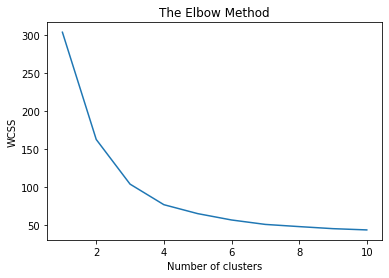

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


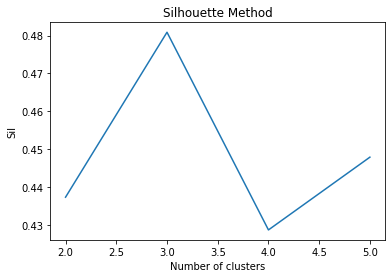

2:0.4372813890435709
3:0.480868335771222
4:0.4286334698293365
5:0.44786001520397084


In [21]:
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

Как можно увидеть, следует брать три кластера, так как уменно при трех кластерах мы получаем максимальное значение- 0,48

# Model

In [23]:
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 3, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['GRE Score', 'TOEFL Score', 'University Rating','SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit', 'level CGPA'])

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,level CGPA
0,0.672772,0.682615,0.652228,0.711015,0.702351,0.724157,1.000000e+00,0.742417,9.950495e-01
1,0.443750,0.526722,0.455078,0.553711,0.581055,0.578087,-5.551115e-16,0.544023,1.000000e+00
2,0.272424,0.326128,0.227273,0.333333,0.384470,0.294160,1.969697e-01,0.309764,2.220446e-16


# Feature Reduction

In [31]:
X = df[:, [0, 1, 8]]

In [38]:
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['CGPA','TOEFL Score','Chance of Admit']).round()

,CGPA,TOEFL Score,Chance of Admit
0,1.0,1.0,1.0
1,0.0,0.0,0.0


Как мы видим студенты которые имеют высокие балы по двум экзаменам имееют высокий шанс поступления в университет

# Results matching

In [40]:
import pickle
input = open('clust.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc = obj["hc"]

In [41]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km)

0.48211251331522725

# Pickle results

In [42]:
import pickle
obj = {'km': km}
output = open('clust-km.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()